In [1]:
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import load_results
import numpy as np

In [2]:
results = load_results('logs/')
rewards = results.loc[results.index.repeat(results.l)].r.reset_index(drop=True)

In [19]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

rewards_smooth_lil = smooth(rewards, 0.995)
rewards_smooth = smooth(rewards, 0.99999)

In [4]:
def cum_gain(rewards):
    new_rewards = []
    best_reward = 0
    for i in range(1, len(rewards)):
        if rewards[i] > best_reward:
            best_reward = rewards[i]
        new_rewards.append(best_reward)
    return new_rewards

cum_rewards = cum_gain(rewards)

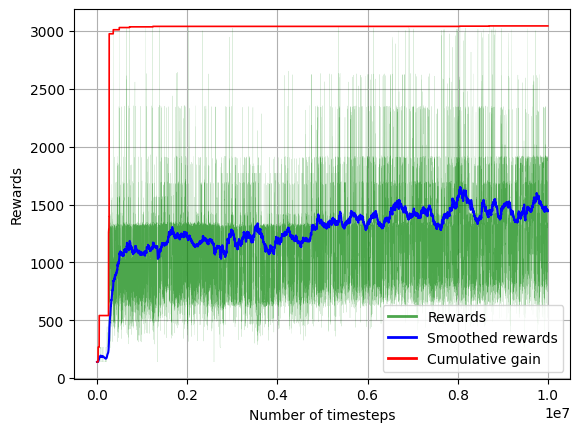

In [27]:
plt.plot(np.arange(len(rewards_smooth_lil)), rewards_smooth_lil, color='g', alpha=0.7, lw=0.07, label='Rewards')
plt.plot(np.arange(len(rewards_smooth)), rewards_smooth, label='Smoothed rewards', color='b')
plt.plot(np.arange(len(cum_rewards)), cum_rewards, label='Cumulative gain', color='r', lw=1.2)
plt.ylabel('Rewards')
plt.xlabel('Number of timesteps')
leg = plt.legend(loc='lower right')
for line in leg.get_lines():
    line.set_linewidth(2.0)
plt.grid()
plt.show()